In [1]:
import sys
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

project_dir = Path(".").absolute().parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
import src.utils.json_util as json_util

In [2]:
log = custom_log.init_logger(log_lvl=10)
para:dict = json_util.load(f_path=project_dir / "data" / "used_data", log=log)
log.info("Following parameters available: %s", para.keys())

2023-10-13 10:01:13,425 MainProcess  - MainThread      INFO  START || custom_log.py
2023-10-13 10:01:13,427 MainProcess  - MainThread      DEBUG Load c:\Users\plaschkies\Documents\PythonProjects\aihiii\data\used_data.json || json_util.py
2023-10-13 10:01:13,430 MainProcess  - MainThread      INFO  Following parameters available: dict_keys(['_raw_data_dir', '_doe_fname', '_doe_metadata_fname']) || 705879224.py


In [6]:
doe = pd.read_excel(project_dir /Path(para["_raw_data_dir"]) / para["_doe_fname"], index_col=0)
doe

,PAB_M_Scal,PAB_Vent_T,Pulse_Angle,Pulse_X_Scale,SLL,V_Init,PERC
0,0.9,0.07,-10,0.8,2140,-18560,5
1,0.9,0.07,-10,0.8,2140,-17060,5
2,0.9,0.07,-10,0.8,2140,-15560,5
3,0.9,0.07,-10,0.8,2140,-14060,5
4,0.9,0.07,-10,0.8,2140,-12560,5
...,...,...,...,...,...,...,...
46870,1.1,0.13,10,1.2,2540,-18560,95
46871,1.1,0.13,10,1.2,2540,-17060,95
46872,1.1,0.13,10,1.2,2540,-15560,95
46873,1.1,0.13,10,1.2,2540,-14060,95


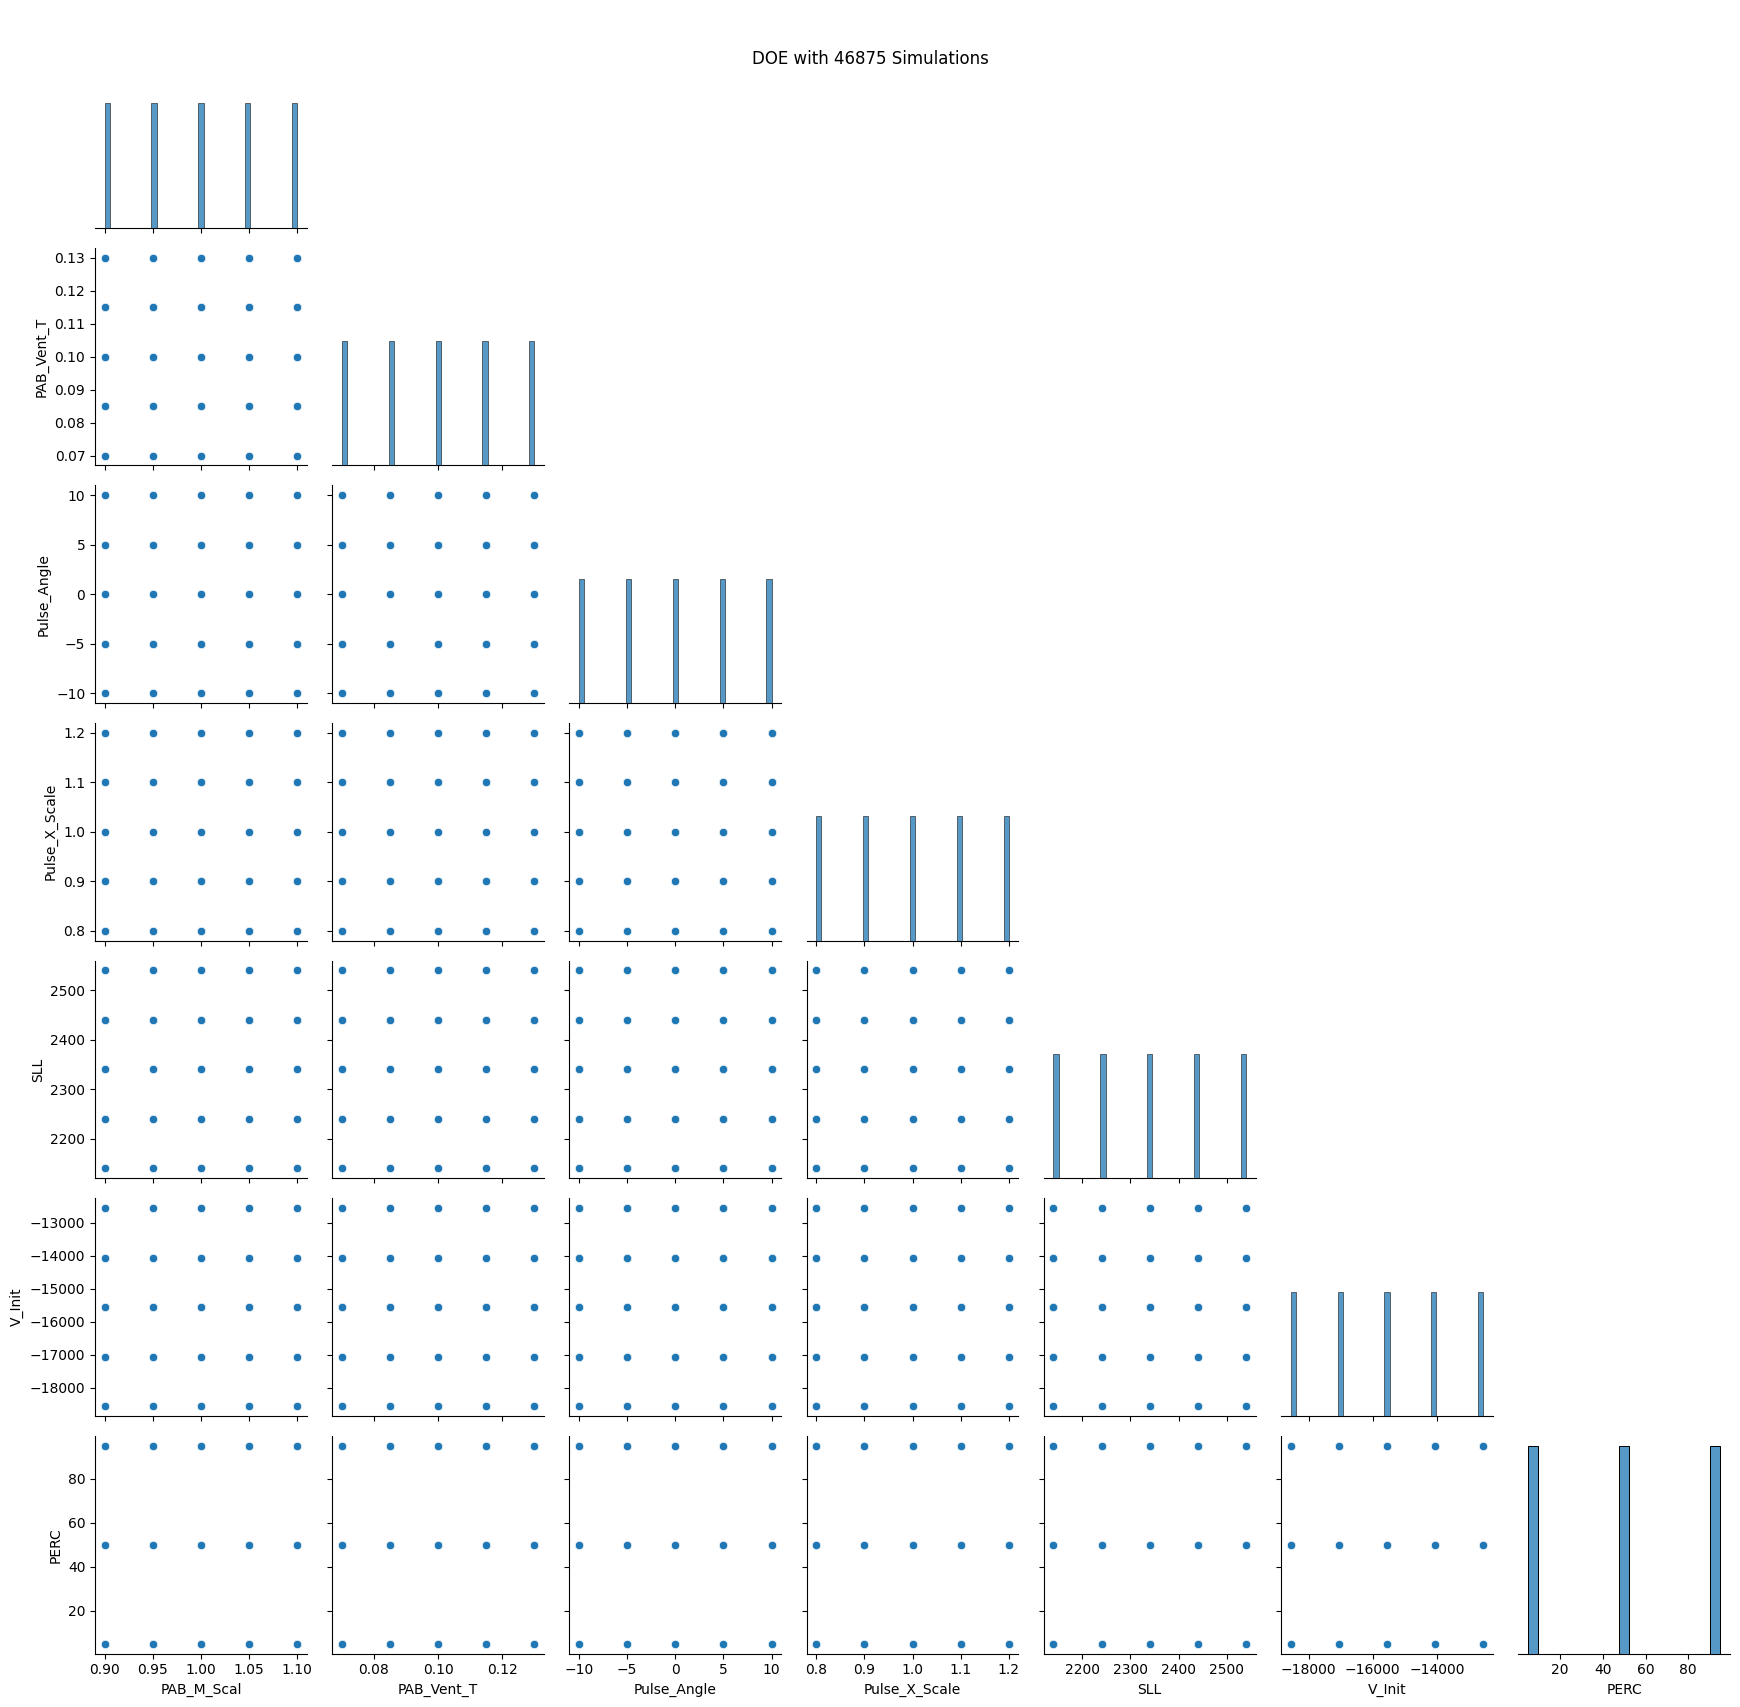

In [14]:
g = sns.pairplot(doe, corner=True)
g.fig.suptitle(f"DOE with {doe.shape[0]} Simulations", y=0.95)
g.fig.tight_layout();